# Membuat Model SVM

**Import Library**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib

**Import Dataset**

In [3]:
df = pd.read_csv('../diabetes.csv')

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Membagi dataset menjadi train dan test**

In [6]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X = df[features]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Membuat Model SVM dan Melatih Model**

In [7]:
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

**Mencoba Memprediksi dari Data Testing**

In [8]:
y_pred = model.predict(X_test)

**Evaluasi Model**

Akurasi: 74.46%

Confusion Matrix:
[[122  29]
 [ 30  50]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



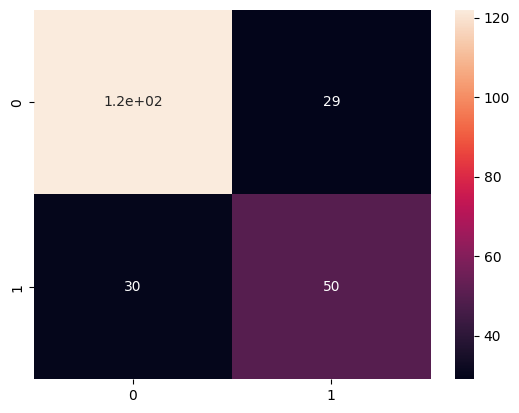

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

**Menyimpan Model**

In [16]:
joblib.dump(model, 'SVM-Model.pkl')

['SVM-Model.pkl']

**Mencoba Load Model dan Melakukan Klasifikasi**

In [17]:
load_model = joblib.load('SVM-Model.pkl')

In [ ]:
predictionsA = load_model.predict(np.array([[30, 25, 5, 0, 23, 85, 40, 0.5]])) # Harusnya data ini diabetes
predictionsB = load_model.predict(np.array([[1, 85, 66, 29, 0, 26.6, .351, 31]])) # Harusnya data ini nggak diabetes

def lakukan_prediksi(predictions):
    if predictions[0] == 0:
        print("Hasil data menunjukkan anda TIDAK menderita Diabetes")
    elif predictions[0] == 1:
        print("Hasil data menunjukkan anda MENDERITA Diabetes")

lakukan_prediksi(predictionsA)
lakukan_prediksi(predictionsB)

0
0
Hasil data menunjukkan anda MENDERITA Diabetes
Hasil data menunjukkan anda TIDAK menderita Diabetes


c:\Users\myoga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\myoga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
